In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [48]:
df_train = pd.read_csv("train_features_chunk_split_aug.csv")
df_test = pd.read_csv("test_features_chunk_split.csv")
df_val = pd.read_csv("validation_features_chunk_split.csv")
df_train.head(5)
import warnings
warnings.filterwarnings('ignore')

In [49]:
df_train.info()
df_test.info()
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12266 entries, 0 to 12265
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   filename     12266 non-null  object 
 1   raga         12266 non-null  object 
 2   rmse         12266 non-null  float64
 3   chroma_stft  12266 non-null  float64
 4   spec_cent    12266 non-null  float64
 5   spec_bw      12266 non-null  float64
 6   mfcc0        12266 non-null  float64
 7   mfcc1        12266 non-null  float64
 8   mfcc2        12266 non-null  float64
 9   mfcc3        12266 non-null  float64
 10  mfcc4        12266 non-null  float64
 11  mfcc5        12266 non-null  float64
 12  mfcc6        12266 non-null  float64
 13  mfcc7        12266 non-null  float64
 14  mfcc8        12266 non-null  float64
 15  mfcc9        12266 non-null  float64
 16  mfcc10       12266 non-null  float64
 17  mfcc11       12266 non-null  float64
 18  mfcc12       12266 non-null  float64
 19  mfcc

In [50]:
df_train.describe()
df_test.describe()
df_val.describe()

,rmse,chroma_stft,spec_cent,spec_bw,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,0.051250,0.282994,1735.954812,1820.735214,-276.519181,111.201781,-30.618475,23.459475,-9.331944,2.689271,...,-5.651050,-6.644558,-2.523215,-5.308837,-2.687490,-3.410564,-3.073584,-3.585941,-2.124376,-4.198094
std,0.033297,0.051446,365.495779,329.467544,78.449388,24.885113,19.516866,12.706649,10.815959,10.458720,...,6.366517,6.400069,6.054278,5.697473,6.332315,5.431765,5.794867,6.519559,5.813466,4.899989
min,0.002153,0.155568,831.834576,1045.347934,-535.058170,25.923363,-91.899180,-25.503900,-53.183180,-29.433104,...,-23.666237,-30.010891,-21.182920,-22.702517,-23.865770,-26.031770,-19.362665,-26.620770,-20.826511,-22.037004
25%,0.021908,0.248806,1452.462529,1511.604035,-332.012660,94.570640,-44.500313,15.511031,-15.107691,-4.353583,...,-9.680090,-11.097564,-6.430341,-9.165475,-6.396763,-7.201519,-7.210091,-7.242052,-5.991741,-7.598653
50%,0.047625,0.280415,1725.176688,1840.930424,-267.393550,111.226210,-28.228780,23.694720,-8.920831,4.783288,...,-6.069285,-6.567466,-1.900313,-5.971392,-2.241315,-3.726921,-2.979664,-3.229166,-1.615152,-4.530785
75%,0.075480,0.311682,2001.495830,2106.315657,-214.958050,130.385700,-15.333917,32.159320,-2.499376,10.010305,...,-1.782757,-1.950271,1.312332,-1.740491,1.477415,0.080278,0.703858,0.943110,1.293890,-1.039632
max,0.206652,0.532291,3182.240643,2703.629723,-104.209860,190.235200,19.127407,56.788723,22.580961,31.667643,...,21.909813,13.986292,23.296900,19.537200,19.397440,19.748875,27.657986,21.971735,26.211246,14.167628


In [51]:
import pandas as pd

raga_counts_train = df_train['raga'].value_counts().sort_values()
raga_counts_test = df_test['raga'].value_counts().sort_values()
raga_counts_val = df_val['raga'].value_counts().sort_values()

print(raga_counts_train)
print(raga_counts_test)
print(raga_counts_val)

raga
Haṁsānandi         6
Hamsadhvani        7
Navrōj             7
Sindhumandāri     12
Nādanāmakriya     17
                ... 
Bēgaḍa           428
Ṣanmukhapriya    430
Bhairavi         450
Harikāmbhōji     454
Rītigauḷa        460
Name: count, Length: 96, dtype: int64
raga
Hamsadhvani       1
Navrōj            1
Haṁsānandi        1
Sindhumandāri     1
Puṇṇāgavarāḷi     2
                 ..
Karaharapriya    58
Kāṁbhōji         71
Tōḍi             88
Ṣanmukhapriya    92
Bhairavi         97
Name: count, Length: 96, dtype: int64
raga
Sindhumandāri     1
Hamsadhvani       1
Navrōj            1
Haṁsānandi        1
Śudda sāvēri      2
                 ..
Karaharapriya    57
Kāṁbhōji         72
Tōḍi             88
Ṣanmukhapriya    92
Bhairavi         96
Name: count, Length: 96, dtype: int64


                                            filename      raga      rmse  \
0                Nee Sari evvaramma.mp3.mp3_chunk172  Bhairavi  0.077272   
1       Sanjay Subrahmanyan - Aru marundu.mp3_chunk5  Kāṁbhōji  0.014703   
2  Chaitra Sairam - Shri Subramanyaya Namaste.mp3...  Kāṁbhōji  0.010187   
3         Sanjay Subrahmanyan - Kamakshi.mp3_chunk69  Bhairavi  0.033727   
4  Sanjay Subrahmanyan - Sarasadalanayana.mp3_chu...     Kamās  0.018742   

   chroma_stft    spec_cent      spec_bw       mfcc0       mfcc1      mfcc2  \
0     0.328172  1561.998149  1527.952177 -202.607300  135.233978 -47.601101   
1     0.312304  1994.893252  2204.161831 -323.626984  105.855278 -11.048509   
2     0.199771  1680.186922  1567.581661 -451.108704  101.968712 -36.518635   
3     0.253145  1648.184588  1987.167828 -280.630096  117.049622 -10.359817   
4     0.249134  2632.506495  2427.524220 -308.159454   63.098831 -31.734604   

       mfcc3  ...      mfcc9     mfcc10     mfcc11     mfcc12     mf

<Figure size 640x480 with 0 Axes>

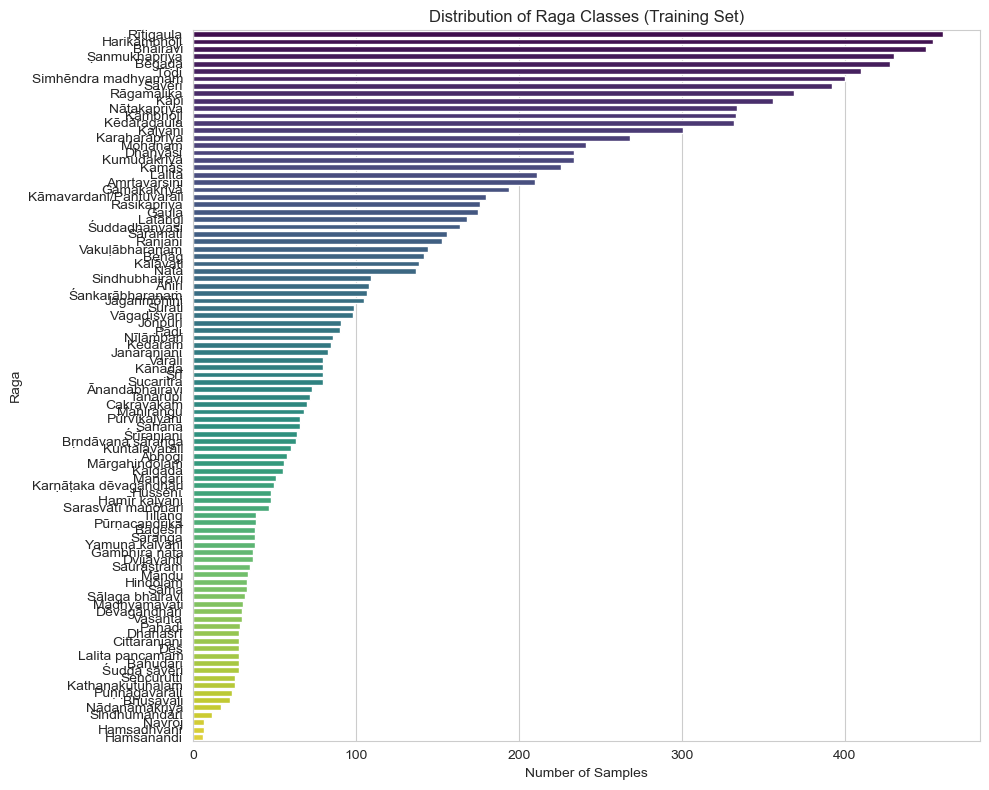

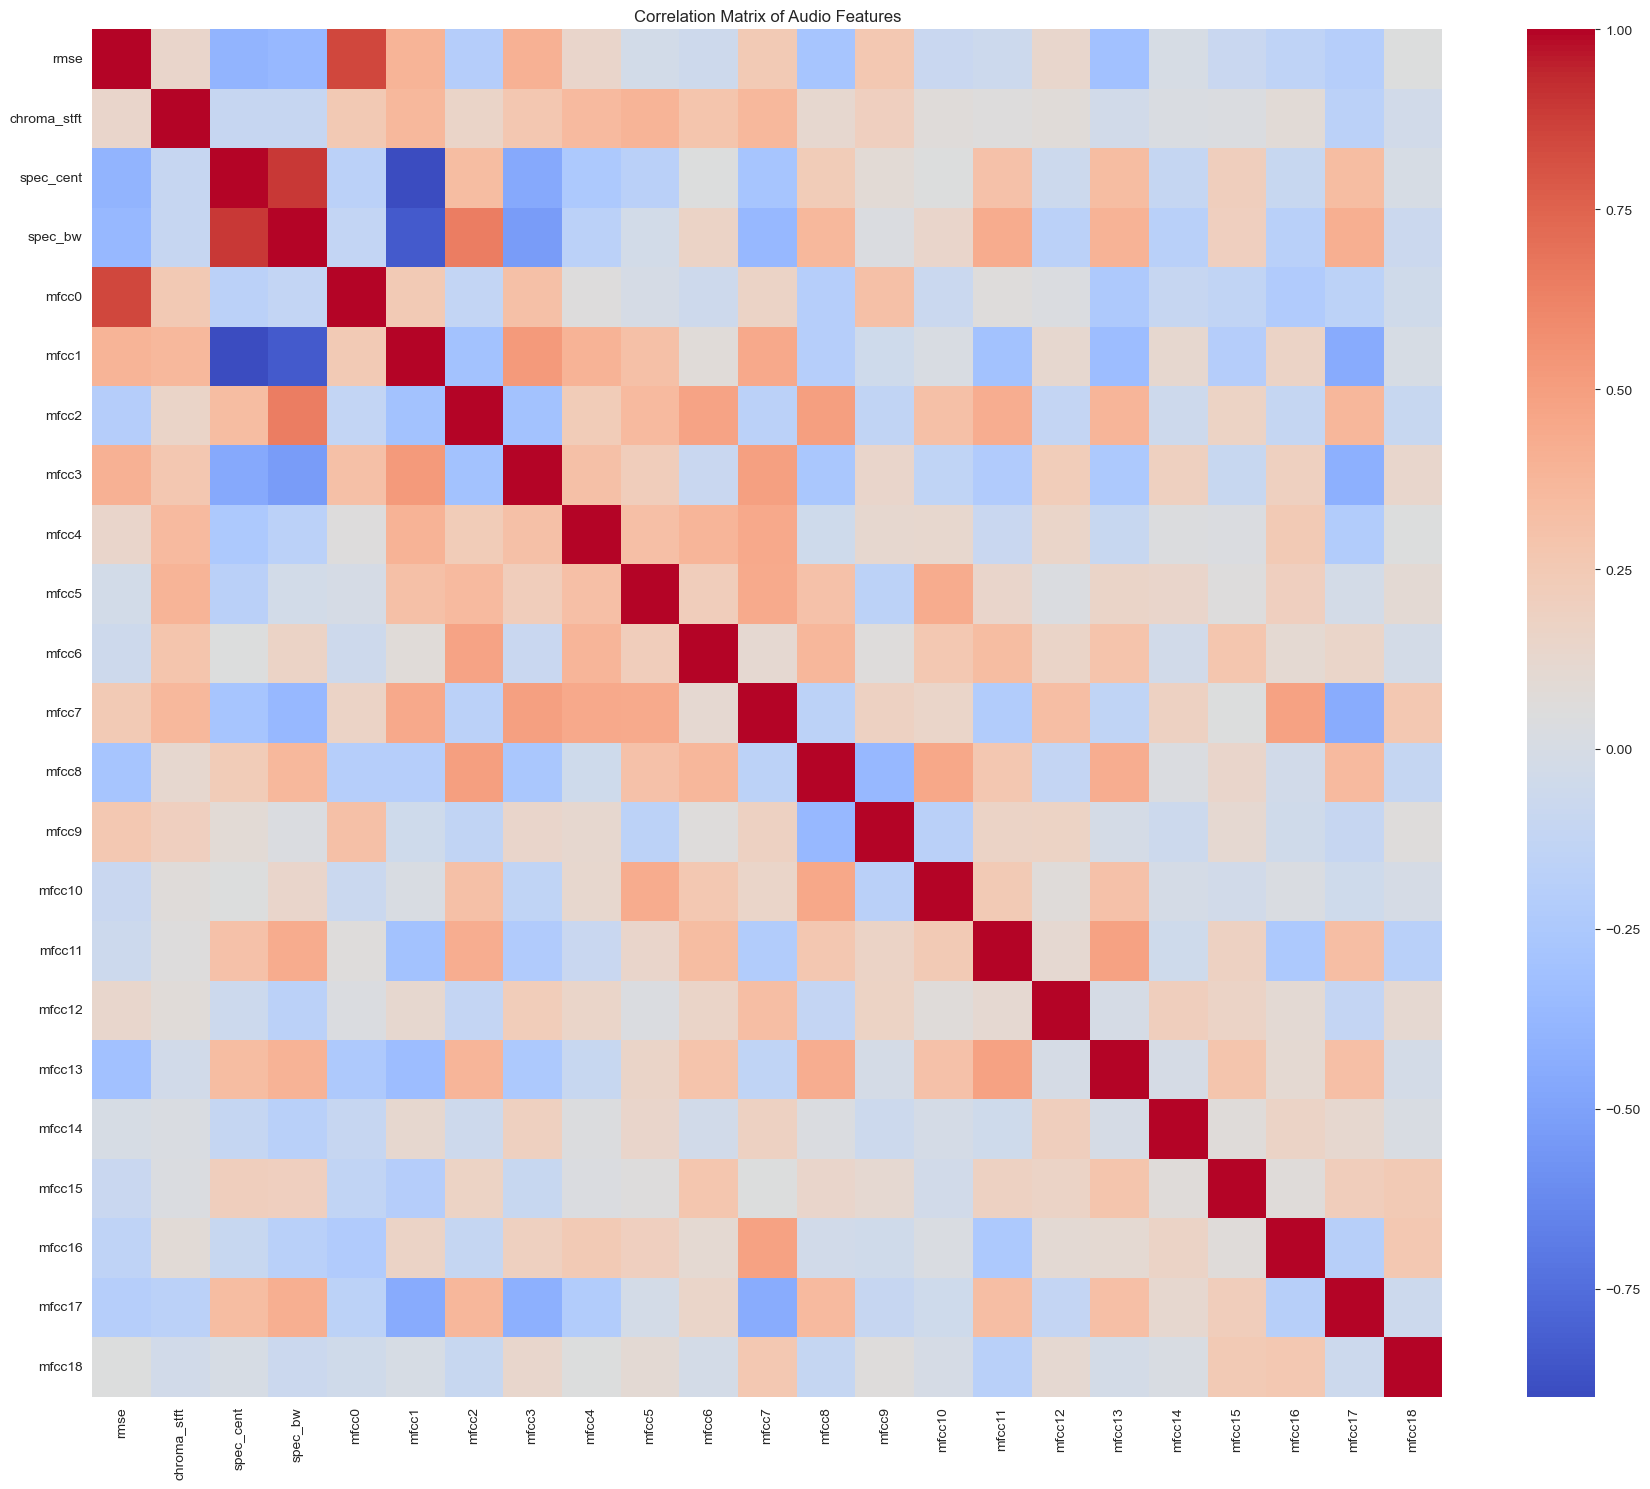

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df_train.head())

# Data cleaning
data_train = df_train.drop(columns=["filename"])
data_test = df_test.drop(columns=["filename"])
data_val = df_val.drop(columns=["filename"])

print("\nData after dropping unnecessary columns")
print(data_train.head())
print(f"Train nulls: {data_train.isnull().sum().sum()}")
print(f"Test nulls: {data_test.isnull().sum().sum()}")
print(f"Val nulls: {data_val.isnull().sum().sum()}")

print(f"\nNo. duplicate rows in train: {data_train.duplicated().sum()}")

print("\nRaga Class Distribution (Imbalance)")
raga_counts = data_train['raga'].value_counts()
print(raga_counts)

plt.figure(figsize=(10, 8))
sns.barplot(x=raga_counts.values, y=raga_counts.index, palette="viridis")
plt.title('Distribution of Raga Classes (Training Set)')
plt.xlabel('Number of Samples')
plt.ylabel('Raga')
plt.tight_layout()
plt.savefig("raga_distribution.png")

print("\nSummary Statistics for Numerical Features")
print(data_train.describe())

numerical_cols = data_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_train[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()
plt.savefig("feature_correlation_heatmap.png")

In [53]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

X_train = data_train.drop(columns=['raga'])
y_train = data_train['raga']

X_val = data_val.drop(columns=['raga'])
y_val = data_val['raga']

X_test = data_test.drop(columns=['raga'])
y_test = data_test['raga']

# Encoding raga labels to integers for classification
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print(f"\nNumber of features: {X_train.shape[1]}")
print(f"Number of unique ragas: {len(np.unique(y_train))}") 
print(f"Feature names: {list(X_train.columns)}")


Number of features: 23
Number of unique ragas: 96
Feature names: ['rmse', 'chroma_stft', 'spec_cent', 'spec_bw', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18']


In [54]:
print(f"Train set size: {X_train.shape[0]} samples ({X_train.shape[0]/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")
print(f"Val set size: {X_val.shape[0]} samples ({X_val.shape[0]/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/(len(X_train)+len(X_val)+len(X_test))*100:.1f}%)")

# Verifying class distribution
print("\nClass distributions")
y_encoded = np.concatenate([y_train, y_val, y_test])
original_distribution = np.bincount(y_encoded) / len(y_encoded) * 100
train_distribution = np.bincount(y_train) / len(y_train) * 100
val_distribution = np.bincount(y_val) / len(y_val) * 100
test_distribution = np.bincount(y_test) / len(y_test) * 100

# Formatting the distributions
formatted_original = ", ".join(f"{x:.1f}%" for x in original_distribution[:5])
formatted_train = ", ".join(f"{x:.1f}%" for x in train_distribution[:5])
formatted_val = ", ".join(f"{x:.1f}%" for x in val_distribution[:5])
formatted_test = ", ".join(f"{x:.1f}%" for x in test_distribution[:5])

print(f"Original: {formatted_original} (first 5 classes)")
print(f"Train: {formatted_train} (first 5 classes)")
print(f"Val: {formatted_val} (first 5 classes)")
print(f"Test: {formatted_test} (first 5 classes)")

Train set size: 12266 samples (81.6%)
Val set size: 1385 samples (9.2%)
Test set size: 1384 samples (9.2%)

Class distributions
Original: 1.7%, 0.2%, 1.1%, 4.3%, 0.2% (first 5 classes)
Train: 1.7%, 0.2%, 1.2%, 3.7%, 0.2% (first 5 classes)
Val: 1.4%, 0.1%, 0.9%, 6.9%, 0.1% (first 5 classes)
Test: 1.4%, 0.1%, 0.9%, 7.0%, 0.1% (first 5 classes)


<Figure size 640x480 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

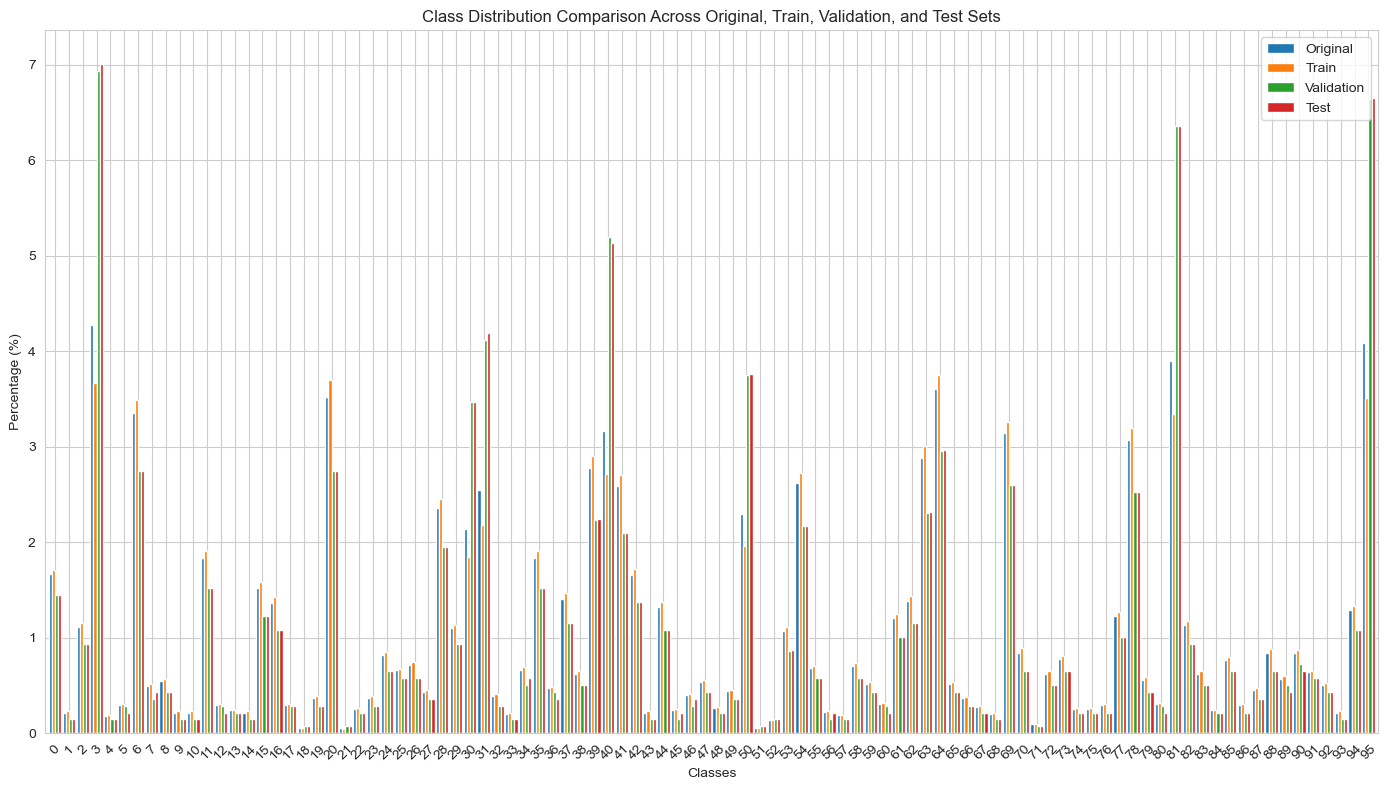

In [55]:
data_dict = {
    "Original": original_distribution,
    "Train": train_distribution,
    "Validation": val_distribution,
    "Test": test_distribution
}

distribution_df = pd.DataFrame(data_dict)

# Plotting
plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")

distribution_df.plot(kind='bar', width=0.9, figsize=(14, 8))

plt.xlabel('Classes')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution Comparison Across Original, Train, Validation, and Test Sets')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [56]:
# Standardization of features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  
X_test_scaled = scaler.transform(X_test)  

Method 1: Random Forest for n_estimators
Accuracy for 50 estimators: 0.8374
Accuracy for 100 estimators: 0.8497
Accuracy for 150 estimators: 0.8540
Accuracy for 200 estimators: 0.8540
Accuracy for 250 estimators: 0.8548
Accuracy for 300 estimators: 0.8468
The best number of estimators is: 250
Best Test Accuracy: 0.8548 (85.48%)


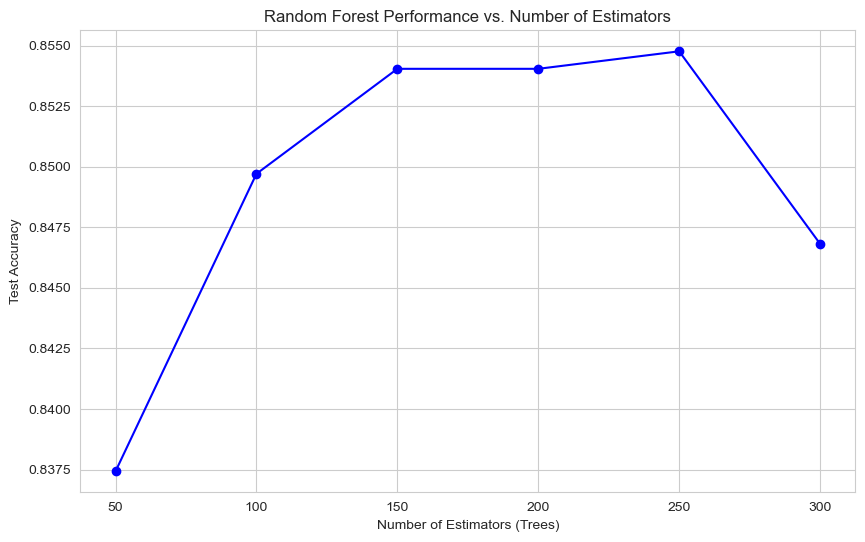


Classification Report (Best Random Forest):
                         precision    recall  f1-score   support

           Amṛtavarṣiṇi       1.00      1.00      1.00        20
               Bahudāri       0.50      1.00      0.67         2
                  Behāg       0.64      0.69      0.67        13
               Bhairavi       0.89      0.92      0.90        97
              Bhūṣāvaḷi       1.00      1.00      1.00         2
                Bāgēśrī       0.75      1.00      0.86         3
                 Bēgaḍa       0.73      0.84      0.78        38
      Bṛndāvana sāranga       1.00      0.50      0.67         6
             Cakravākaṁ       0.75      1.00      0.86         6
           Cittaranjani       1.00      1.00      1.00         2
               Dhanaśrī       1.00      1.00      1.00         2
               Dhanyāsi       0.94      0.81      0.87        21
             Dvijāvanti       0.75      1.00      0.86         3
           Dēvagāndhāri       1.00      1.00

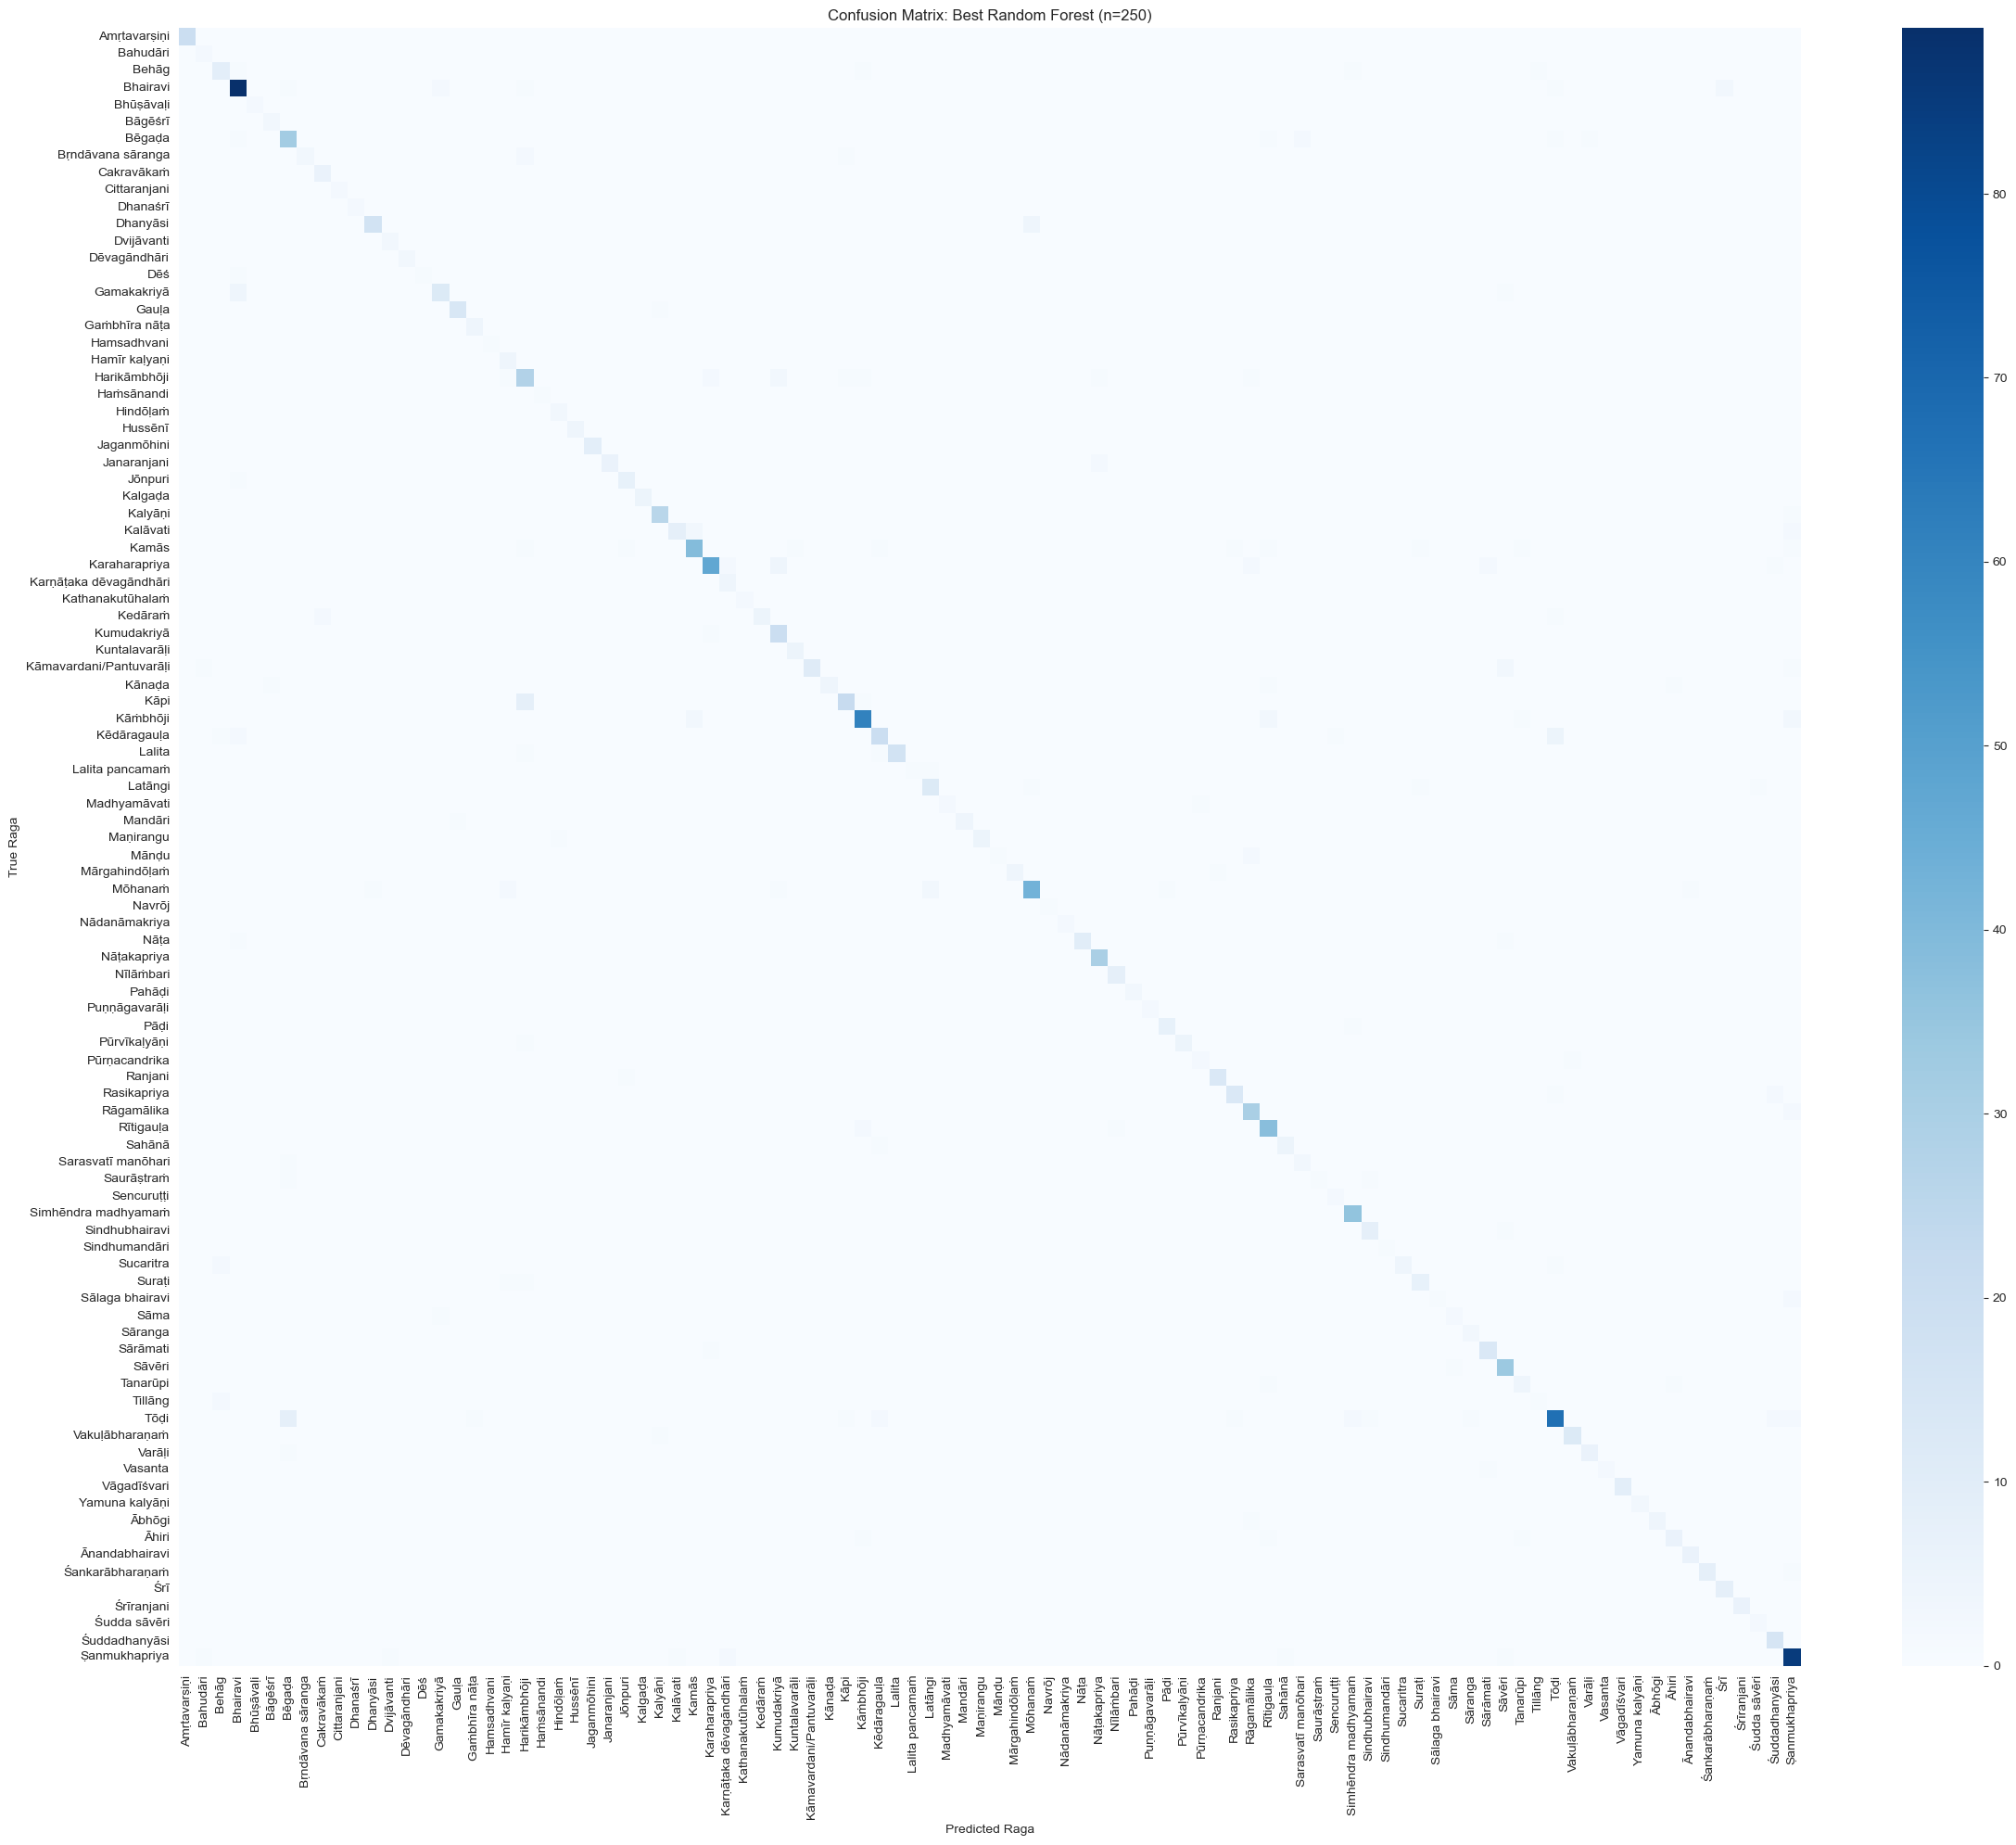

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Assume X_train_scaled, y_train, X_test_scaled, y_test, and label_encoder
# are pre-defined and loaded from the previous cells.

print("Method 1: Random Forest for n_estimators")

# Range of n_estimators to test
estimator_options = [50, 100, 150, 200, 250, 300]
accuracies = []
best_accuracy = 0
best_n_estimators = 0
best_rf_classifier = None

# Loop through the options
for n in estimator_options:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf_classifier.fit(X_train_scaled, y_train)
    y_pred_rf = rf_classifier.predict(X_test_scaled)
    
    # Evaluate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred_rf)
    accuracies.append(accuracy)
    print(f"Accuracy for {n} estimators: {accuracy:.4f}")
    
    # Keep track of the best performing model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n
        best_rf_classifier = rf_classifier # Save the best model

print(f"The best number of estimators is: {best_n_estimators}")
print(f"Best Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

plt.figure(figsize=(10, 6))
plt.plot(estimator_options, accuracies, marker='o', linestyle='-', color='b')
plt.title('Random Forest Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Test Accuracy')
plt.xticks(estimator_options)
plt.grid(True)
plt.show()

# We already have the predictions from the best model, but if we didn't, we'd use this
y_pred_best_rf = best_rf_classifier.predict(X_test_scaled)

print("\nClassification Report (Best Random Forest):")
print(classification_report(y_test, y_pred_best_rf, target_names=label_encoder.classes_))

#Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(24, 20))
sns.heatmap(conf_matrix_rf, annot=False, cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix: Best Random Forest (n={best_n_estimators})')
plt.xlabel('Predicted Raga')
plt.ylabel('True Raga')
plt.tight_layout()
plt.show()


Method 2: K-Nearest Neighbors (KNN)

KNN Accuracy: 0.8165 (81.65%)

Classification Report (KNN):
                         precision    recall  f1-score   support

           Amṛtavarṣiṇi       0.86      0.95      0.90        20
               Bahudāri       0.33      1.00      0.50         2
                  Behāg       0.46      0.92      0.62        13
               Bhairavi       0.81      0.92      0.86        97
              Bhūṣāvaḷi       1.00      1.00      1.00         2
                Bāgēśrī       0.75      1.00      0.86         3
                 Bēgaḍa       0.81      0.76      0.78        38
      Bṛndāvana sāranga       1.00      0.83      0.91         6
             Cakravākaṁ       0.75      1.00      0.86         6
           Cittaranjani       1.00      1.00      1.00         2
               Dhanaśrī       0.67      1.00      0.80         2
               Dhanyāsi       0.81      0.81      0.81        21
             Dvijāvanti       0.60      1.00      0.75   

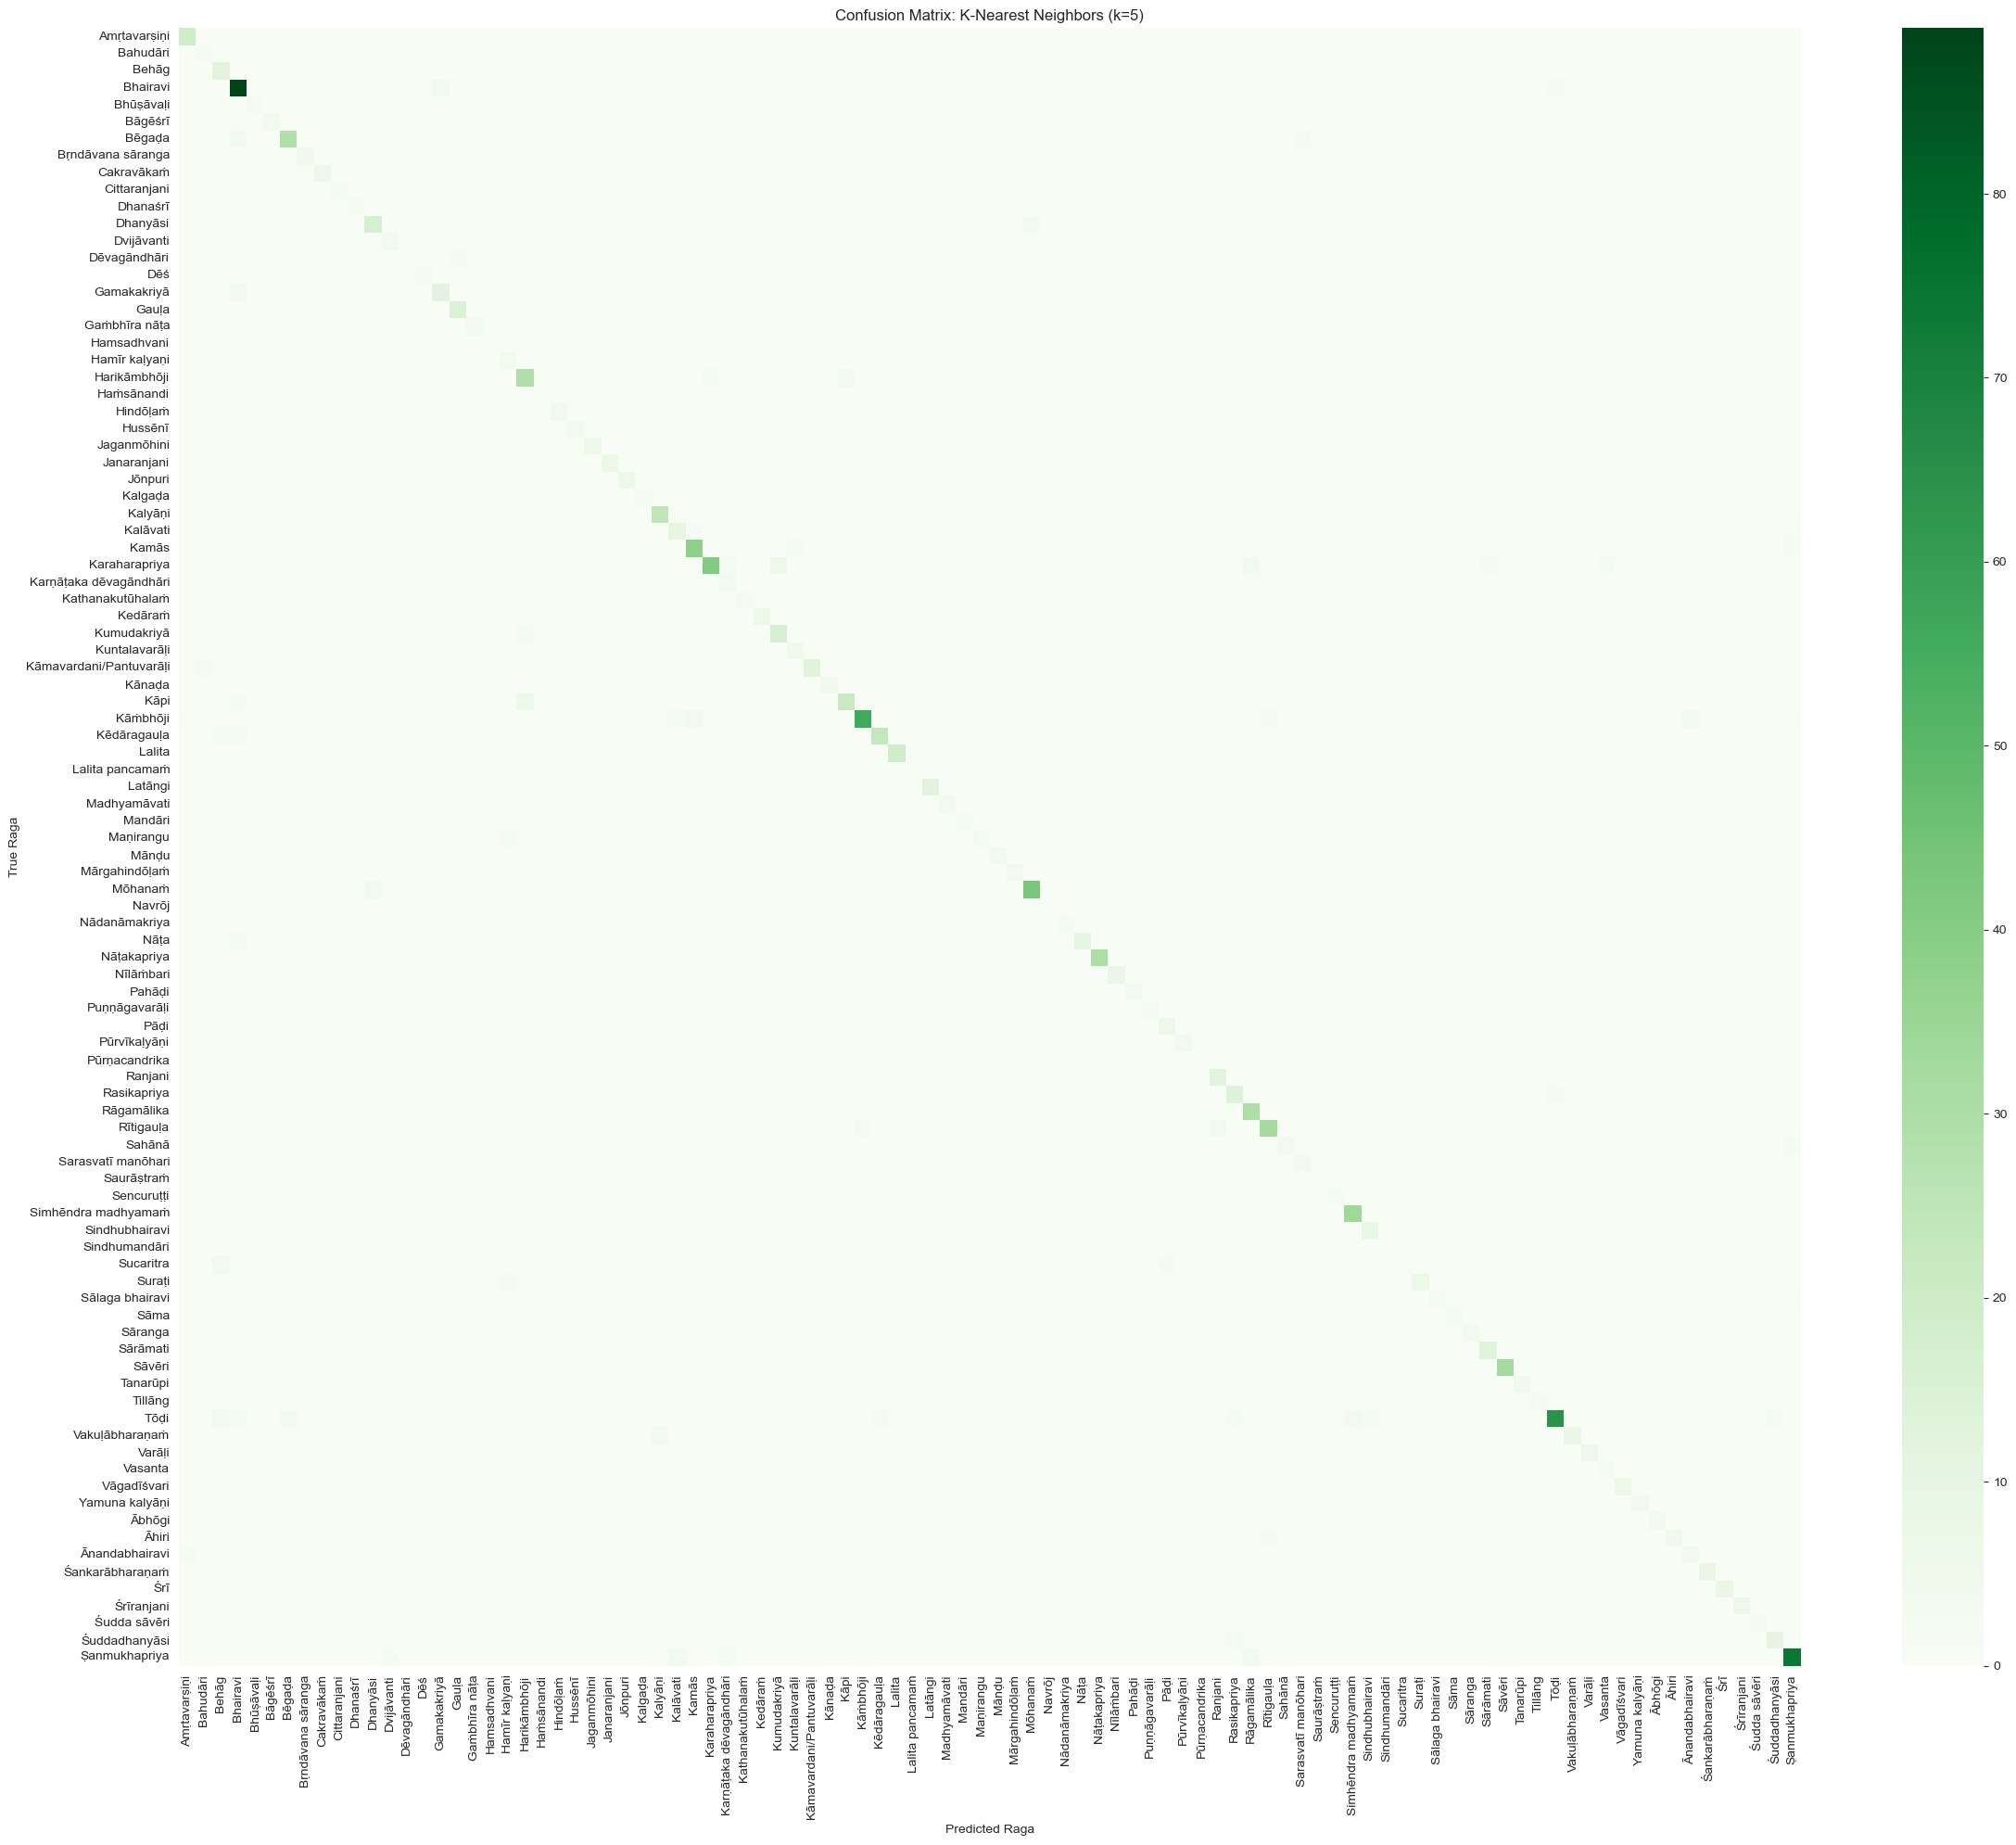

In [58]:
#K-Nearest Neighbors (KNN)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Method 2: K-Nearest Neighbors (KNN)")

knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nKNN Accuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

#Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(24, 20))
sns.heatmap(conf_matrix_knn, annot=False, cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix: K-Nearest Neighbors (k=5)')
plt.xlabel('Predicted Raga')
plt.ylabel('True Raga')
plt.tight_layout()
plt.show()